In [1]:
import sys
sys.path.append('/project/src')
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
top_dir = '/project'
data_dir = os.path.join(top_dir, 'data')
preproc_dir = os.path.join(data_dir, 'preprocessed')
inp_dir = os.path.join(preproc_dir, 'Gupta_2020_Precompiled_Cleaned')
out_dir = os.path.join(data_dir, 'results/LogisticRegressionCV_PCA_Healthy_v_ACVD_Jie_only')

In [3]:
os.listdir(inp_dir)

['MatrixDataClean.csv',
 'FeatMetaDataClean.csv',
 'SampleMetaDataClean.csv',
 'SampleMetaDataManual.csv']

In [4]:
MatrixData = np.loadtxt(os.path.join(inp_dir, 'MatrixDataClean.csv'))
MatrixData.shape

(4347, 903)

In [5]:
SampleMeta = pd.read_csv(os.path.join(inp_dir, 'SampleMetaDataClean.csv'))
SampleMeta.shape

(4347, 38)

In [6]:
filter_indices = SampleMeta["Study Accession"].isin(['PRJEB21528']).to_numpy()
SampleMeta = SampleMeta[ filter_indices ]
SampleMeta.shape

(282, 38)

In [7]:
SampleMeta["Phenotype"].value_counts()

ACVD           152
Healthy         75
Overweight      40
Obesity          8
Underweight      7
Name: Phenotype, dtype: int64

In [8]:
MatrixData = MatrixData[ filter_indices ]
MatrixData.shape

(282, 903)

In [9]:
FeatMeta = pd.read_csv(os.path.join(inp_dir, 'FeatMetaDataClean.csv'))
FeatMeta

,Unnamed: 0,feature
0,s__Abiotrophia_defectiva,s__Abiotrophia_defectiva
1,s__Acetobacter_unclassified,s__Acetobacter_unclassified
2,s__Achromobacter_piechaudii,s__Achromobacter_piechaudii
3,s__Achromobacter_unclassified,s__Achromobacter_unclassified
4,s__Achromobacter_xylosoxidans,s__Achromobacter_xylosoxidans
...,...,...
898,s__Weissella_koreensis,s__Weissella_koreensis
899,s__Weissella_paramesenteroides,s__Weissella_paramesenteroides
900,s__Weissella_unclassified,s__Weissella_unclassified
901,s__Wohlfahrtiimonas_chitiniclastica,s__Wohlfahrtiimonas_chitiniclastica


In [10]:
X = MatrixData

In [11]:
y = SampleMeta['Phenotype'].to_numpy().astype('str') == 'ACVD'
y = y.astype('int64')

In [12]:
pd.value_counts(SampleMeta['Phenotype'])

ACVD           152
Healthy         75
Overweight      40
Obesity          8
Underweight      7
Name: Phenotype, dtype: int64

# Examine Number of Nonzero Features Per Sample

Recall that for X, rows are samples, columns are features. we count the number of times for each sample that you have a nonzero feature.

In [13]:
feats_per_sample = np.logical_not(np.equal(X, 0)).astype('int32').sum(axis=1)

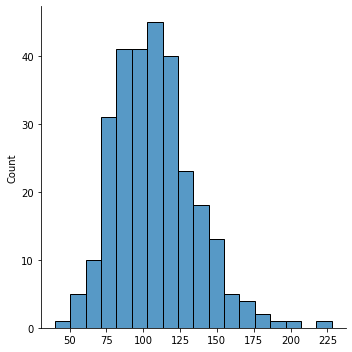

In [14]:
sns.displot(feats_per_sample)

In [15]:
X.shape

(282, 903)